# Quick Introduction to PyTorch

PyTorch is an optimized tensor library for deep learning using GPUs and CPUs. This notebook provides a comprehensive introduction to PyTorch fundamentals and practical examples.

## Contents
1. **PyTorch Basics**: Tensors, operations, and autograd
2. **Neural Networks**: Building blocks with `torch.nn`
3. **Regression Example**: Predicting continuous values
4. **Classification Example**: Multi-class classification
5. **Training Tips**: Best practices and utilities

---

## Prerequisites
- Python 3.8+
- PyTorch 2.0+
- Basic understanding of machine learning concepts

In [11]:
# Import required libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader, TensorDataset
import numpy as np
import matplotlib.pyplot as plt

# Set random seeds for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# Check PyTorch version and device availability
print(f"PyTorch Version: {torch.__version__}")
print(f"CUDA Available: {torch.cuda.is_available()}")
print(f"MPS Available: {torch.backends.mps.is_available()}")

# Set device (prioritize: CUDA > MPS > CPU)
if torch.cuda.is_available():
    device = torch.device("cuda")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")
print(f"Using device: {device}")

PyTorch Version: 2.6.0
CUDA Available: False
MPS Available: True
Using device: mps


## 1. PyTorch Tensors

Tensors are the fundamental data structure in PyTorch - similar to NumPy arrays but with GPU acceleration support and automatic differentiation capabilities.

In [12]:
# Creating tensors
print("=== Creating Tensors ===")

# From Python lists
tensor_from_list = torch.tensor([[1, 2], [3, 4]])
print(f"From list:\n{tensor_from_list}\n")

# With specific shapes
zeros = torch.zeros(2, 3) # 2x3 tensor of zeros
print(f"Zeros:\n{zeros}\n")
ones = torch.ones(2, 3) # 2x3 tensor of ones
print(f"Ones:\n{ones}\n")
eye = torch.eye(3) # 3x3 identity matrix
print(f"Identity Matrix:\n{eye}\n")
rand = torch.rand(2, 3)  # Uniform [0, 1)
print(f"Random uniform:\n{rand}\n")
randn = torch.randn(2, 3)  # Normal distribution
print(f"Random normal:\n{randn}\n")

# From NumPy
numpy_array = np.array([[1, 2, 3], [4, 5, 6]])
tensor_from_numpy = torch.from_numpy(numpy_array)
print(f"From NumPy:\n{tensor_from_numpy}\n")

# Tensor properties
print(f"Shape: {tensor_from_list.shape}")
print(f"Data type: {tensor_from_list.dtype}")
print(f"Device: {tensor_from_list.device}")

=== Creating Tensors ===
From list:
tensor([[1, 2],
        [3, 4]])

Zeros:
tensor([[0., 0., 0.],
        [0., 0., 0.]])

Ones:
tensor([[1., 1., 1.],
        [1., 1., 1.]])

Identity Matrix:
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

Random uniform:
tensor([[0.8823, 0.9150, 0.3829],
        [0.9593, 0.3904, 0.6009]])

Random normal:
tensor([[ 1.1561,  0.3965, -2.4661],
        [ 0.3623,  0.3765, -0.1808]])

From NumPy:
tensor([[1, 2, 3],
        [4, 5, 6]])

Shape: torch.Size([2, 2])
Data type: torch.int64
Device: cpu


### Understanding Tensor Creation

The code above demonstrates various ways to create tensors in PyTorch:

**Key Tensor Properties:**
- **Shape** (`tensor.shape`): Dimensions of the tensor
- **Data Type** (`tensor.dtype`): Type of data stored (e.g., `torch.float32`, `torch.int64`)
- **Device** (`tensor.device`): Where the tensor is stored (`cpu`, `cuda`, or `mps`)

**Creation Methods:**
- `torch.tensor()` creates tensors from Python lists or tuples
- `torch.zeros()`, `torch.ones()`, and `torch.eye()` create tensors with specific patterns
- `torch.rand()` generates values from a uniform distribution between 0 and 1
- `torch.randn()` generates values from a standard normal distribution (Gaussian)
- `torch.from_numpy()` converts NumPy arrays to tensors

**Important Notes:**
- Tensors created from NumPy arrays share the same memory by default (changes to one affect the other)
- Use `.clone()` to create an independent copy of a tensor
- All creation functions support specifying dtype and device for memory allocation

In [13]:
# Tensor operations
print("=== Tensor Operations ===")

a = torch.tensor([[1.0, 2.0], [3.0, 4.0]])
b = torch.tensor([[5.0, 6.0], [7.0, 8.0]])

# Element-wise operations
print(f"Addition:\n{a + b}\n")
print(f"Multiplication:\n{a * b}\n") 

# Matrix multiplication
print(f"Matrix multiplication:\n{torch.matmul(a, b)}\n")
# Alternative: a @ b

# Reshaping
x = torch.randn(4, 3)
print(f"Original shape: {x.shape}")
print(f"Reshaped: {x.view(2, 6).shape}") 
print(f"Flatten: {x.view(-1).shape}")

# Indexing and slicing
tensor = torch.arange(12).reshape(3, 4)
print(f"\nTensor:\n{tensor}")
print(f"First row: {tensor[0]}")
print(f"Last column: {tensor[:, -1]}")
print(f"Slice [1:3, 1:3]:\n{tensor[1:3, 1:3]}")

=== Tensor Operations ===
Addition:
tensor([[ 6.,  8.],
        [10., 12.]])

Multiplication:
tensor([[ 5., 12.],
        [21., 32.]])

Matrix multiplication:
tensor([[19., 22.],
        [43., 50.]])

Original shape: torch.Size([4, 3])
Reshaped: torch.Size([2, 6])
Flatten: torch.Size([12])

Tensor:
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
First row: tensor([0, 1, 2, 3])
Last column: tensor([ 3,  7, 11])
Slice [1:3, 1:3]:
tensor([[ 5,  6],
        [ 9, 10]])


## 2. Automatic Differentiation (Autograd)

PyTorch's autograd system automatically computes gradients for backpropagation. This is essential for training neural networks.

In [14]:
# Autograd example
print("=== Autograd Example ===")

# Create a tensor with gradient tracking enabled
x = torch.tensor([2.0, 3.0], requires_grad=True)
print(f"x: {x}")

# Perform operations
y = x ** 2 + 3 * x + 1
print(f"y = x^2 + 3x + 1: {y}")

# Compute gradients
# dy/dx = 2x + 3
y_sum = y.sum()  # Need a scalar for backward()
y_sum.backward() # Compute gradients

print(f"Gradient dy/dx: {x.grad}")
print(f"Expected [2*2+3, 2*3+3] = [7, 9]")

# Example with a more complex computation graph
x = torch.randn(3, requires_grad=True)
y = x * 2
while y.data.norm() < 100: # Loop until the norm of y exceeds 100
    y = y * 2

print(f"\nComplex example:")
print(f"Final y: {y}")

# Compute gradients with a vector
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float)
y.backward(v)
print(f"Gradient: {x.grad}")

=== Autograd Example ===
x: tensor([2., 3.], requires_grad=True)
y = x^2 + 3x + 1: tensor([11., 19.], grad_fn=<AddBackward0>)
Gradient dy/dx: tensor([7., 9.])
Expected [2*2+3, 2*3+3] = [7, 9]

Complex example:
Final y: tensor([ -44.9844, -101.2023,  -11.7132], grad_fn=<MulBackward0>)
Gradient: tensor([1.2800e+01, 1.2800e+02, 1.2800e-02])


### Understanding the Complex Autograd Example

The code above demonstrates **dynamic computation graphs** and **vector-Jacobian products**:

**What's happening:**

1. Creates a random 3-element tensor with gradient tracking enabled
2. Initializes y by doubling x
3. The loop continues until the L2 norm (Euclidean length: $\sqrt{y_1^2 + y_2^2 + y_3^2}$) exceeds 100
   - Accessing `.data` gets the underlying values without gradient tracking
   - Different runs will execute different numbers of iterations depending on the random values
4. Each iteration doubles y, creating a new computation graph node

**Why this matters:**

- **Dynamic Computation Graph**: The number of operations isn't known beforehand—PyTorch builds the graph dynamically during execution
- **Flexible Control Flow**: You can use standard Python loops and conditionals while maintaining automatic differentiation
- **Vector-Jacobian Product**: When calling `.backward(v)` with a gradient vector on non-scalar output, PyTorch computes the vector-Jacobian product, which is essential for backpropagation in complex networks

This showcases PyTorch's key advantage: combining Python's flexibility with automatic differentiation capabilities.

## 3. Neural Networks with torch.nn

PyTorch provides `torch.nn` module for building neural networks. Key components:
- **nn.Module**: Base class for all neural network modules
- **nn.Linear**: Fully connected layer
- **nn.Conv2d**: 2D convolutional layer
- **nn.ReLU, nn.Sigmoid, etc.**: Activation functions
- **nn.MSELoss, nn.CrossEntropyLoss, etc.**: Loss functions

In [15]:
# Simple neural network example
class SimpleNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Create model instance
model = SimpleNet(input_size=10, hidden_size=20, output_size=5)
print(model)

# Model summary
print(f"\nTotal parameters: {sum(p.numel() for p in model.parameters())}")
print(f"Trainable parameters: {sum(p.numel() for p in model.parameters() if p.requires_grad)}")

# Forward pass example
sample_input = torch.randn(1, 10)
output = model(sample_input)
print(f"\nInput shape: {sample_input.shape}")
print(f"Output shape: {output.shape}")
print(f"Output: {output}")

SimpleNet(
  (fc1): Linear(in_features=10, out_features=20, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=20, out_features=5, bias=True)
)

Total parameters: 325
Trainable parameters: 325

Input shape: torch.Size([1, 10])
Output shape: torch.Size([1, 5])
Output: tensor([[ 0.0906, -0.0619, -0.0545, -0.2133, -0.3476]],
       grad_fn=<AddmmBackward0>)


---

## 4. Regression Example: Predicting House Prices

Let's implement a complete regression task to predict house prices based on features like size, number of rooms, etc.

In [16]:
# Generate synthetic house price data
print("=== Generating Synthetic House Price Data ===")

# Features: [size_sqft, num_rooms, age_years, distance_to_city_km]
np.random.seed(42)
n_samples = 1000

# Generate features
size = np.random.uniform(50, 300, n_samples)
rooms = np.random.randint(1, 6, n_samples)
age = np.random.uniform(0, 50, n_samples)
distance = np.random.uniform(1, 30, n_samples)

# Generate target: price = 300*size + 20000*rooms - 500*age - 1000*distance + noise
price = (300 * size + 20000 * rooms - 500 * age - 1000 * distance + 
         np.random.normal(0, 10000, n_samples))

# Combine features
X = np.column_stack([size, rooms, age, distance])
y = price.reshape(-1, 1) # Target variable

# Normalize features for better training
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_normalized = (X - X_mean) / X_std 

# Normalize target
y_mean = y.mean()
y_std = y.std()
y_normalized = (y - y_mean) / y_std

print(f"Dataset shape: X={X.shape}, y={y.shape}")
print(f"Price range: ${y.min():.2f} - ${y.max():.2f}")
print(f"Average price: ${y.mean():.2f}")

# Split into train and test sets
train_size = int(0.8 * n_samples) # 80% for training
X_train, X_test = X_normalized[:train_size], X_normalized[train_size:]
y_train, y_test = y_normalized[:train_size], y_normalized[train_size:]

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test)

print(f"\nTraining set: {X_train_tensor.shape}")
print(f"Test set: {X_test_tensor.shape}")

=== Generating Synthetic House Price Data ===
Dataset shape: X=(1000, 4), y=(1000, 1)
Price range: $-18611.04 - $184636.09
Average price: $84008.97

Training set: torch.Size([800, 4])
Test set: torch.Size([200, 4])


In [17]:
# Define regression model
class RegressionNet(nn.Module):
    def __init__(self, input_dim, hidden_dims, output_dim=1):
        """
        Neural network for regression
        
        Args:
            input_dim: Number of input features
            hidden_dims: List of hidden layer dimensions
            output_dim: Number of output values (default: 1 for regression)
        """
        super(RegressionNet, self).__init__()
        
        # Build layers dynamically
        layers = []
        prev_dim = input_dim
        
        for hidden_dim in hidden_dims:
            layers.append(nn.Linear(prev_dim, hidden_dim))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(0.2))  # Dropout for regularization
            prev_dim = hidden_dim
        
        # Output layer (no activation for regression)
        layers.append(nn.Linear(prev_dim, output_dim))
        
        self.network = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.network(x)

# Create model
input_dim = X_train.shape[1]
model = RegressionNet(input_dim, hidden_dims=[64, 32, 16], output_dim=1)
model = model.to(device)

print(model)
print(f"\nTotal parameters: {sum(p.numel() for p in model.parameters()):,}")

RegressionNet(
  (network): Sequential(
    (0): Linear(in_features=4, out_features=64, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=64, out_features=32, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.2, inplace=False)
    (6): Linear(in_features=32, out_features=16, bias=True)
    (7): ReLU()
    (8): Dropout(p=0.2, inplace=False)
    (9): Linear(in_features=16, out_features=1, bias=True)
  )
)

Total parameters: 2,945


### Understanding the Regression Model Architecture

The `RegressionNet` class demonstrates how to build a flexible neural network for regression tasks:

**Key Components:**

1. **Dynamic Layer Building**: The model accepts a list of hidden dimensions (e.g., `[64, 32, 16]`), making it easy to experiment with different architectures

2. **Layer Stack for Each Hidden Layer**:
   - `nn.Linear()`: Fully connected layer that transforms input
   - `nn.ReLU()`: Activation function introducing non-linearity
   - `nn.Dropout(0.2)`: Randomly drops 20% of neurons during training to prevent overfitting

3. **Output Layer**: 
   - No activation function (raw linear output)
   - This is appropriate for regression tasks where we predict continuous values
   - For classification, we'd use `nn.Sigmoid()` or rely on loss functions like `CrossEntropyLoss`

4. **Sequential Container**: `nn.Sequential()` chains all layers together, automatically passing output from one layer as input to the next

5. **Forward Method**: Defines how data flows through the network during both training and inference

**Architecture Example:**
A model with 4 input features and hidden dimensions `[64, 32, 16]` creates:
4 → 64 → 32 → 16 → 1 (input features → hidden layers → output)

**Device Transfer**: Using `.to(device)` transfers the model to GPU/MPS for accelerated training

In [18]:
# Training setup
criterion = nn.MSELoss()  # Mean Squared Error for regression
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Create DataLoader for batch processing
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Training loop
num_epochs = 100
train_losses = []
test_losses = []

print("=== Training Regression Model ===")
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0
    
    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        
        # Forward pass
        predictions = model(batch_X)
        loss = criterion(predictions, batch_y)
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        epoch_loss += loss.item()
    
    # Calculate average loss
    avg_train_loss = epoch_loss / len(train_loader)
    train_losses.append(avg_train_loss)
    
    # Evaluate on test set
    model.eval()
    with torch.no_grad():
        test_pred = model(X_test_tensor.to(device))
        test_loss = criterion(test_pred, y_test_tensor.to(device))
        test_losses.append(test_loss.item())
    
    if (epoch + 1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss:.4f}, Test Loss: {test_loss:.4f}")

print("\nTraining completed!")

=== Training Regression Model ===
Epoch [10/100], Train Loss: 0.1492, Test Loss: 0.0962
Epoch [20/100], Train Loss: 0.1204, Test Loss: 0.0852
Epoch [30/100], Train Loss: 0.1210, Test Loss: 0.0925
Epoch [40/100], Train Loss: 0.1269, Test Loss: 0.0855
Epoch [50/100], Train Loss: 0.1178, Test Loss: 0.0944
Epoch [60/100], Train Loss: 0.1137, Test Loss: 0.0856
Epoch [70/100], Train Loss: 0.1078, Test Loss: 0.0887
Epoch [80/100], Train Loss: 0.1136, Test Loss: 0.0929
Epoch [90/100], Train Loss: 0.1097, Test Loss: 0.0848
Epoch [100/100], Train Loss: 0.1119, Test Loss: 0.0835

Training completed!


### Understanding the Training Loop

The training code demonstrates the complete PyTorch training workflow:

**Setup Components:**
- **Loss Function**: Computes Mean Squared Error for regression, measuring how far predictions are from actual values
- **Optimizer**: Adam optimizer adjusts model weights to minimize loss; learning rate controls step size of updates
- **DataLoader**: Handles batch processing (32 samples at a time) and shuffles data each epoch to prevent overfitting

**Key Concepts:**

1. **Training Mode**: Calling `model.train()` enables dropout and batch normalization training behavior

2. **Three-Step Training Cycle per Batch**:
   - **Forward Pass**: Compute predictions from inputs
   - **Loss Calculation**: Measure prediction error
   - **Backward Pass**: 
     - Clear previous gradients (they accumulate by default)
     - Compute gradients via backpropagation
     - Update model weights using the optimizer

3. **Evaluation Mode**: 
   - `model.eval()` disables dropout and uses batch norm statistics
   - Using `torch.no_grad()` saves memory by not tracking gradients during evaluation

4. **Tracking Progress**:
   - Store train/test losses each epoch for visualization
   - Print progress periodically to monitor training

5. **Device Management**: All tensors are moved to the appropriate device (GPU/MPS/CPU) for computation

**Why This Works:**
- Batch processing makes training efficient and helps the model generalize better
- Regular evaluation on test set helps detect overfitting early
- Gradient accumulation control prevents incorrect weight updates

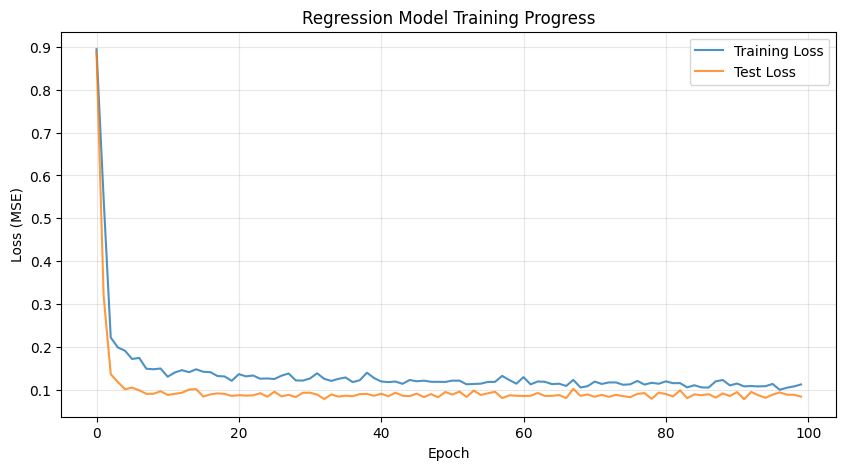


=== Regression Model Performance ===
Root Mean Squared Error: $11,159.53
Mean Absolute Error: $8,826.79
R² Score: 0.9260


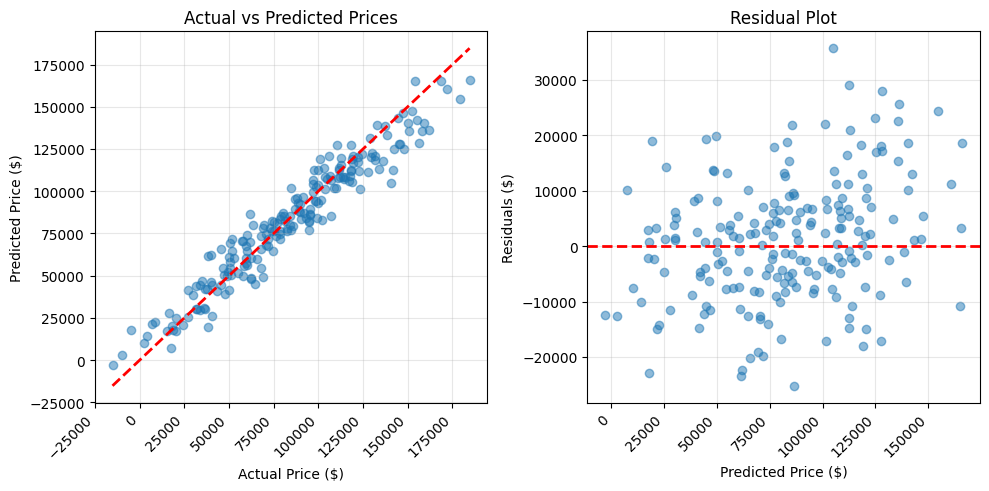

In [19]:
# Visualize training progress
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss', alpha=0.8)
plt.plot(test_losses, label='Test Loss', alpha=0.8)
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Regression Model Training Progress')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Evaluate model performance
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor.to(device)).cpu().numpy()

# Denormalize predictions and actual values
predictions_denorm = predictions * y_std + y_mean
y_test_denorm = y_test * y_std + y_mean

# Calculate metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

mse = mean_squared_error(y_test_denorm, predictions_denorm)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test_denorm, predictions_denorm)
r2 = r2_score(y_test_denorm, predictions_denorm)

print("\n=== Regression Model Performance ===")
print(f"Root Mean Squared Error: ${rmse:,.2f}")
print(f"Mean Absolute Error: ${mae:,.2f}")
print(f"R² Score: {r2:.4f}")

# Visualize predictions vs actual
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test_denorm, predictions_denorm, alpha=0.5)
plt.plot([y_test_denorm.min(), y_test_denorm.max()], 
         [y_test_denorm.min(), y_test_denorm.max()], 'r--', lw=2)
plt.xlabel('Actual Price ($)')
plt.ylabel('Predicted Price ($)')
plt.title('Actual vs Predicted Prices')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)

# Visualize Residuals
plt.subplot(1, 2, 2)
residuals = y_test_denorm - predictions_denorm
plt.scatter(predictions_denorm, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--', lw=2)
plt.xlabel('Predicted Price ($)')
plt.ylabel('Residuals ($)')
plt.title('Residual Plot')
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Understanding the Visualization

The plots above provide insights into model performance:

**Actual vs Predicted Prices (Left Plot):**
- Each point represents a test sample
- Perfect predictions would align with the red diagonal line
- Points close to the line indicate accurate predictions
- Scatter pattern shows how well the model generalizes

**Residual Plot (Right Plot):**
- **Residuals** = Actual Price - Predicted Price (prediction errors)
- The red horizontal line at y=0 represents perfect predictions
- **What to look for:**
  - **Random scatter around zero**: Indicates good model fit with no systematic bias
  - **Patterns or curves**: Suggest the model is missing important relationships
  - **Funnel shape**: Indicates heteroscedasticity (variance changes with predicted values)
  - **Outliers**: Points far from zero represent poorly predicted samples

**Interpretation:**
- Well-distributed residuals suggest the linear model captures the underlying patterns
- Most residuals clustering near zero indicates consistent prediction accuracy
- Random scatter (no clear pattern) confirms appropriate model complexity

---

## 5. Classification Example: Iris Dataset

Let's implement a multi-class classification task using the famous Iris dataset to classify flower species.

In [20]:
# Load and prepare Iris dataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

print("=== Loading Iris Dataset ===")

# Load dataset
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

print(f"Dataset shape: X={X_iris.shape}, y={y_iris.shape}")
print(f"Number of classes: {len(np.unique(y_iris))}")
print(f"Class names: {iris.target_names}")
print(f"Feature names: {iris.feature_names}")

# Split dataset
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(
    X_iris, y_iris, test_size=0.2, random_state=42, stratify=y_iris
)

# Standardize features
scaler = StandardScaler()
X_train_cls = scaler.fit_transform(X_train_cls)
X_test_cls = scaler.transform(X_test_cls)

# Convert to PyTorch tensors
X_train_cls_tensor = torch.FloatTensor(X_train_cls)
y_train_cls_tensor = torch.LongTensor(y_train_cls)
X_test_cls_tensor = torch.FloatTensor(X_test_cls)
y_test_cls_tensor = torch.LongTensor(y_test_cls)

print(f"\nTraining set: {X_train_cls_tensor.shape}")
print(f"Test set: {X_test_cls_tensor.shape}")
print(f"Class distribution (train): {np.bincount(y_train_cls)}")
print(f"Class distribution (test): {np.bincount(y_test_cls)}")

=== Loading Iris Dataset ===
Dataset shape: X=(150, 4), y=(150,)
Number of classes: 3
Class names: ['setosa' 'versicolor' 'virginica']
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

Training set: torch.Size([120, 4])
Test set: torch.Size([30, 4])
Class distribution (train): [40 40 40]
Class distribution (test): [10 10 10]


### Understanding the Data Preparation

The code above demonstrates proper data preparation for a classification task:

**About the Iris Dataset:**
- The Iris dataset is one of the most famous datasets in machine learning, introduced by statistician Ronald Fisher in 1936
- Contains 150 samples from three species of Iris flowers: **Setosa**, **Versicolor**, and **Virginica**
- Each species has 50 samples, making it a balanced dataset
- Four features measured in centimeters:
  - **Sepal Length**: Length of the sepal (outer part of the flower)
  - **Sepal Width**: Width of the sepal
  - **Petal Length**: Length of the petal (inner part of the flower)
  - **Petal Width**: Width of the petal
- Goal: Predict the species based on these four measurements
- Well-suited for classification algorithms and serves as a benchmark for testing models

**Key Steps:**

1. **Train-Test Split**: 
   - `test_size=0.2` reserves 20% of data for testing (30 samples)
   - `stratify=y_iris` ensures each class is proportionally represented in both sets
   - `random_state=42` makes the split reproducible

2. **Feature Standardization**:
   - `StandardScaler` transforms features to have mean=0 and standard deviation=1
   - `fit_transform()` on training data learns scaling parameters and applies them
   - `transform()` on test data uses training set's parameters (prevents data leakage)
   - Standardization helps neural networks train faster and more reliably

3. **Tensor Conversion**:
   - `FloatTensor` for input features (continuous values)
   - `LongTensor` for labels (integer class indices: 0, 1, 2)
   - PyTorch requires specific data types for different operations

**Why This Matters:**
- Stratified splitting prevents class imbalance in train/test sets
- Proper scaling prevents features with larger ranges from dominating training
- Separate scaling for train/test maintains realistic evaluation conditions

In [21]:
# Define classification model
class ClassificationNet(nn.Module):
    def __init__(self, input_dim, hidden_dims, num_classes):
        """
        Neural network for multi-class classification
        
        Args:
            input_dim: Number of input features
            hidden_dims: List of hidden layer dimensions
            num_classes: Number of output classes
        """
        super(ClassificationNet, self).__init__()
        
        layers = []
        prev_dim = input_dim
        
        for hidden_dim in hidden_dims:
            layers.append(nn.Linear(prev_dim, hidden_dim))
            layers.append(nn.ReLU())
            layers.append(nn.BatchNorm1d(hidden_dim))  # Batch normalization
            layers.append(nn.Dropout(0.3))
            prev_dim = hidden_dim
        
        # Output layer (no activation - CrossEntropyLoss includes softmax)
        layers.append(nn.Linear(prev_dim, num_classes))
        
        self.network = nn.Sequential(*layers)
    
    def forward(self, x):
        return self.network(x)

# Create classification model
input_dim = X_train_cls.shape[1]
num_classes = len(np.unique(y_iris))
cls_model = ClassificationNet(input_dim, hidden_dims=[16, 8], num_classes=num_classes)
cls_model = cls_model.to(device)

print(cls_model)
print(f"\nTotal parameters: {sum(p.numel() for p in cls_model.parameters()):,}")

ClassificationNet(
  (network): Sequential(
    (0): Linear(in_features=4, out_features=16, bias=True)
    (1): ReLU()
    (2): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=16, out_features=8, bias=True)
    (5): ReLU()
    (6): BatchNorm1d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=8, out_features=3, bias=True)
  )
)

Total parameters: 291


In [22]:
# Training setup for classification
criterion_cls = nn.CrossEntropyLoss()  # Cross-entropy for multi-class classification
optimizer_cls = optim.Adam(cls_model.parameters(), lr=0.01)

# Learning rate scheduler for better convergence
scheduler = optim.lr_scheduler.StepLR(optimizer_cls, step_size=30, gamma=0.5)

# Create DataLoader
train_dataset_cls = TensorDataset(X_train_cls_tensor, y_train_cls_tensor)
train_loader_cls = DataLoader(train_dataset_cls, batch_size=16, shuffle=True)

# Training loop
num_epochs_cls = 150
train_losses_cls = []
train_accuracies = []
test_accuracies = []

print("=== Training Classification Model ===")
for epoch in range(num_epochs_cls):
    cls_model.train()
    epoch_loss = 0
    correct = 0
    total = 0
    
    for batch_X, batch_y in train_loader_cls:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        
        # Forward pass
        outputs = cls_model(batch_X)
        loss = criterion_cls(outputs, batch_y)
        
        # Backward pass and optimization
        optimizer_cls.zero_grad()
        loss.backward()
        optimizer_cls.step()
        
        epoch_loss += loss.item()
        
        # Calculate accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += batch_y.size(0)
        correct += (predicted == batch_y).sum().item()
    
    scheduler.step()
    
    # Calculate metrics
    avg_train_loss = epoch_loss / len(train_loader_cls)
    train_accuracy = 100 * correct / total
    train_losses_cls.append(avg_train_loss)
    train_accuracies.append(train_accuracy)
    
    # Evaluate on test set
    cls_model.eval()
    with torch.no_grad():
        test_outputs = cls_model(X_test_cls_tensor.to(device))
        _, test_predicted = torch.max(test_outputs.data, 1)
        test_accuracy = 100 * (test_predicted == y_test_cls_tensor.to(device)).sum().item() / y_test_cls_tensor.size(0)
        test_accuracies.append(test_accuracy)
    
    if (epoch + 1) % 30 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs_cls}], Loss: {avg_train_loss:.4f}, "
              f"Train Acc: {train_accuracy:.2f}%, Test Acc: {test_accuracy:.2f}%")

print("\nTraining completed!")

=== Training Classification Model ===
Epoch [30/150], Loss: 0.1490, Train Acc: 94.17%, Test Acc: 96.67%
Epoch [60/150], Loss: 0.1033, Train Acc: 97.50%, Test Acc: 100.00%
Epoch [90/150], Loss: 0.1606, Train Acc: 95.00%, Test Acc: 100.00%
Epoch [120/150], Loss: 0.1902, Train Acc: 95.83%, Test Acc: 100.00%
Epoch [150/150], Loss: 0.0796, Train Acc: 97.50%, Test Acc: 100.00%

Training completed!


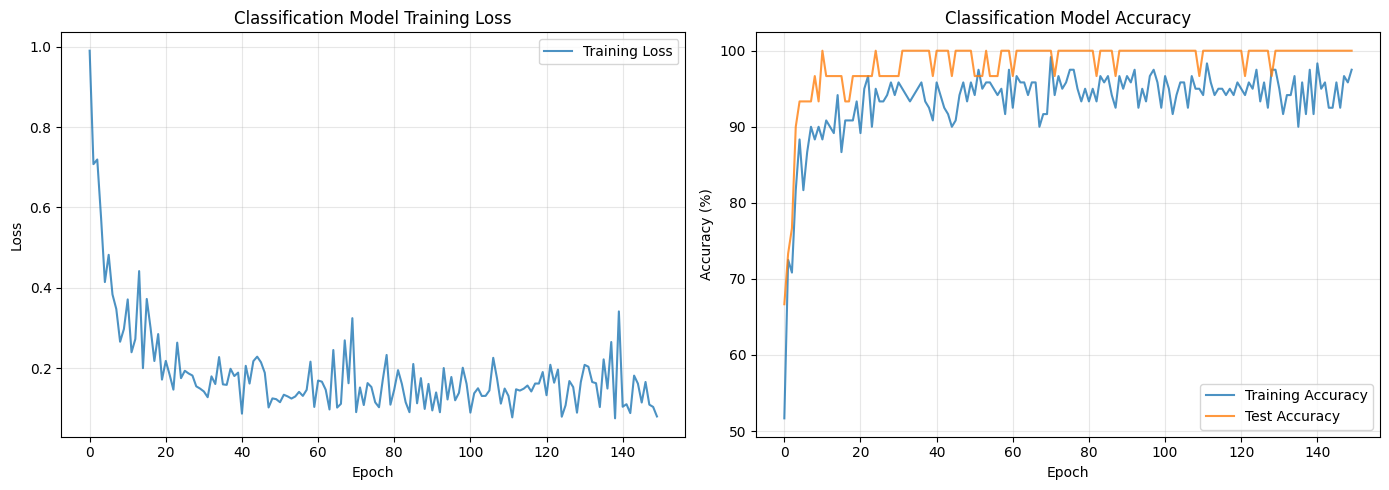


=== Classification Model Performance ===
Test Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



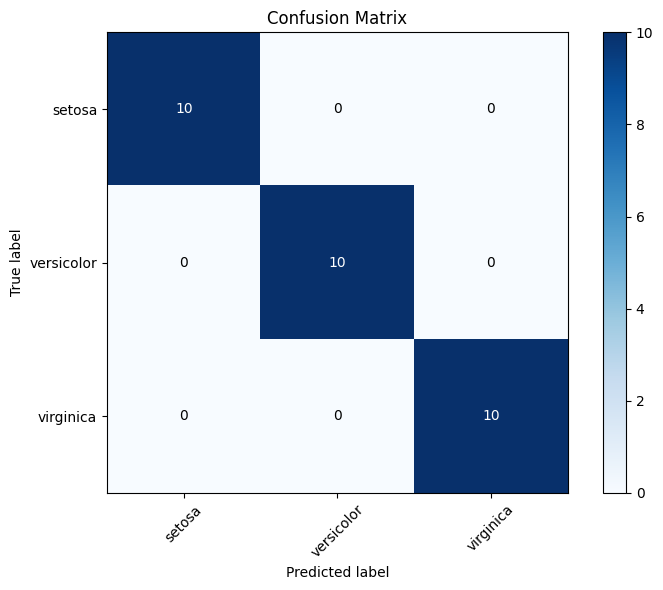

In [23]:
# Visualize classification training progress
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Loss plot
axes[0].plot(train_losses_cls, label='Training Loss', alpha=0.8)
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Loss')
axes[0].set_title('Classification Model Training Loss')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Accuracy plot
axes[1].plot(train_accuracies, label='Training Accuracy', alpha=0.8)
axes[1].plot(test_accuracies, label='Test Accuracy', alpha=0.8)
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy (%)')
axes[1].set_title('Classification Model Accuracy')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Evaluate final model performance
cls_model.eval()
with torch.no_grad():
    test_outputs = cls_model(X_test_cls_tensor.to(device))
    _, predictions_cls = torch.max(test_outputs, 1)
    predictions_cls = predictions_cls.cpu().numpy()

# Classification metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

accuracy = accuracy_score(y_test_cls, predictions_cls)
print("\n=== Classification Model Performance ===")
print(f"Test Accuracy: {accuracy * 100:.2f}%\n")

print("Classification Report:")
print(classification_report(y_test_cls, predictions_cls, target_names=iris.target_names))

# Confusion matrix
cm = confusion_matrix(y_test_cls, predictions_cls)
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(iris.target_names))
plt.xticks(tick_marks, iris.target_names, rotation=45)
plt.yticks(tick_marks, iris.target_names)

# Add text annotations
thresh = cm.max() / 2.
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             ha="center", va="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

---

## 6. Model Saving and Loading

PyTorch provides multiple ways to save and load models.

In [24]:
# Save model - Method 1: Save entire model (not recommended for production)
torch.save(cls_model, 'iris_classifier_full.pth')
print("Method 1: Saved entire model")

# Save model - Method 2: Save state dict (RECOMMENDED)
torch.save({
    'model_state_dict': cls_model.state_dict(),
    'optimizer_state_dict': optimizer_cls.state_dict(),
    'epoch': num_epochs_cls,
    'loss': train_losses_cls[-1],
}, 'iris_classifier_checkpoint.pth')
print("Method 2: Saved model checkpoint with state dict")

# Load model - Method 1
loaded_model = torch.load('iris_classifier_full.pth', weights_only=False)
loaded_model.eval()
print("\nMethod 1: Loaded entire model")

# Load model - Method 2 (RECOMMENDED)
checkpoint = torch.load('iris_classifier_checkpoint.pth', weights_only=False)

# Create new model instance
loaded_model2 = ClassificationNet(input_dim, hidden_dims=[16, 8], num_classes=num_classes)
loaded_model2.load_state_dict(checkpoint['model_state_dict'])
loaded_model2.eval()

print(f"Method 2: Loaded model from checkpoint (epoch {checkpoint['epoch']})")

# Verify loaded model works correctly
with torch.no_grad():
    test_outputs = loaded_model2(X_test_cls_tensor)
    _, predictions = torch.max(test_outputs, 1)
    accuracy = (predictions == y_test_cls_tensor).sum().item() / y_test_cls_tensor.size(0)
    print(f"Loaded model test accuracy: {accuracy * 100:.2f}%")

Method 1: Saved entire model
Method 2: Saved model checkpoint with state dict

Method 1: Loaded entire model
Method 2: Loaded model from checkpoint (epoch 150)
Loaded model test accuracy: 100.00%


---

## 7. Using GPU Acceleration

PyTorch makes it easy to move computations to GPU for faster training.

In [25]:
# Check device availability
print("=== Device Information ===")
print(f"CUDA Available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"CUDA Device Count: {torch.cuda.device_count()}")
    print(f"Current Device: {torch.cuda.current_device()}")
    print(f"Device Name: {torch.cuda.get_device_name(0)}")

print(f"MPS Available: {torch.backends.mps.is_available()}")

# Set device (prioritize: CUDA > MPS > CPU)
if torch.cuda.is_available():
    device = torch.device("cuda")
elif torch.backends.mps.is_available():
    device = torch.device("mps")
else:
    device = torch.device("cpu")
print(f"\nUsing device: {device}")

# Example: Moving data and model to GPU
tensor_cpu = torch.randn(3, 3)
tensor_gpu = tensor_cpu.to(device)
print(f"\nTensor device: {tensor_gpu.device}")

# Move model to device
example_model = SimpleNet(10, 20, 5).to(device)
print(f"Model device: {next(example_model.parameters()).device}")

# Best practice: Create device-agnostic training code
def train_step(model, data, target, criterion, optimizer, device):
    """Device-agnostic training step"""
    # Move data to device
    data, target = data.to(device), target.to(device)
    
    # Forward pass
    output = model(data)
    loss = criterion(output, target)
    
    # Backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    return loss.item()

print("\nDevice-agnostic training function defined!")

=== Device Information ===
CUDA Available: False
MPS Available: True

Using device: mps

Tensor device: mps:0
Model device: mps:0

Device-agnostic training function defined!


---

## 8. Key PyTorch Concepts Summary

### Essential Components

1. **Tensors**: Multi-dimensional arrays with GPU support
   - `torch.tensor()`, `torch.zeros()`, `torch.randn()`
   - Operations: `+`, `*`, `@`, `view()`, `reshape()`

2. **Autograd**: Automatic differentiation
   - `requires_grad=True` enables gradient tracking
   - `.backward()` computes gradients
   - `.grad` accesses computed gradients

3. **Neural Networks** (`torch.nn`):
   - `nn.Module`: Base class for models
   - `nn.Linear`: Fully connected layer
   - `nn.ReLU()`, `nn.Sigmoid()`: Activation functions
   - `nn.Dropout()`, `nn.BatchNorm1d()`: Regularization

4. **Loss Functions**:
   - `nn.MSELoss()`: Regression
   - `nn.CrossEntropyLoss()`: Multi-class classification
   - `nn.BCELoss()`: Binary classification

5. **Optimizers** (`torch.optim`):
   - `optim.SGD()`: Stochastic Gradient Descent
   - `optim.Adam()`: Adaptive Moment Estimation
   - `optim.RMSprop()`: Root Mean Square Propagation

6. **Data Loading** (`torch.utils.data`):
   - `Dataset`: Custom dataset class
   - `DataLoader`: Batch loading with shuffling
   - `TensorDataset`: Simple dataset from tensors

### Training Loop Pattern

```python
for epoch in range(num_epochs):
    for batch_data, batch_labels in dataloader:
        # 1. Forward pass
        outputs = model(batch_data)
        loss = criterion(outputs, batch_labels)
        
        # 2. Backward pass
        optimizer.zero_grad()  # Clear gradients
        loss.backward()         # Compute gradients
        optimizer.step()        # Update weights
```

### Best Practices

- Use `.to(device)` for GPU acceleration
- Call `model.train()` before training, `model.eval()` before evaluation
- Use `with torch.no_grad():` for inference to save memory
- Save model state dict, not entire model
- Normalize/standardize input features
- Use DataLoader for efficient batch processing

---

## 9. Additional Resources

### Official Documentation
- **PyTorch Documentation**: https://pytorch.org/docs/stable/index.html
- **PyTorch Tutorials**: https://pytorch.org/tutorials/
- **PyTorch Examples**: https://github.com/pytorch/examples

### Learning Resources
- **Deep Learning with PyTorch**: https://isip.piconepress.com/courses/temple/ece_4822/resources/books/Deep-Learning-with-PyTorch.pdf
- **Mathematics of Deep Learning**: https://issuu.com/cmb321/docs/deep_learning_ebook

### Key Topics to Explore Next
1. **Convolutional Neural Networks (CNNs)** for image data
2. **Recurrent Neural Networks (RNNs/LSTMs)** for sequential data
3. **Transfer Learning** with pre-trained models
4. **Custom Datasets** and data augmentation
5. **Model deployment** with TorchScript and ONNX
6. **Distributed Training** for large-scale models
7. **PyTorch Lightning** for cleaner training code

### Useful Tools
- **TensorBoard**: Visualize training metrics
- **torchvision**: Computer vision datasets and models
- **torchaudio**: Audio processing utilities
- **torchtext**: NLP datasets and utilities

## 10. Practice Exercise

Try modifying the code above to:
1. Change the regression model architecture (add/remove layers)
2. Experiment with different learning rates and optimizers
3. Add early stopping to prevent overfitting
4. Implement a binary classification task
5. Try different activation functions (LeakyReLU, Tanh, etc.)

**Challenge**: Implement a custom Dataset class for your own data!

In [26]:
# Bonus: Custom Dataset Example
class CustomDataset(Dataset):
    """Example of a custom PyTorch Dataset"""
    
    def __init__(self, features, labels, transform=None):
        """
        Args:
            features: numpy array or tensor of features
            labels: numpy array or tensor of labels
            transform: optional transform to be applied on features
        """
        self.features = torch.FloatTensor(features) if isinstance(features, np.ndarray) else features
        self.labels = torch.FloatTensor(labels) if isinstance(labels, np.ndarray) else labels
        self.transform = transform
    
    def __len__(self):
        return len(self.features)
    
    def __getitem__(self, idx):
        feature = self.features[idx]
        label = self.labels[idx]
        
        if self.transform:
            feature = self.transform(feature)
        
        return feature, label

# Example usage
custom_dataset = CustomDataset(X_train, y_train)
custom_loader = DataLoader(custom_dataset, batch_size=32, shuffle=True)

print(f"Custom dataset created with {len(custom_dataset)} samples")
print(f"DataLoader will provide {len(custom_loader)} batches")

# Get a sample batch
sample_features, sample_labels = next(iter(custom_loader))
print(f"\nSample batch shape: features={sample_features.shape}, labels={sample_labels.shape}")

Custom dataset created with 800 samples
DataLoader will provide 25 batches

Sample batch shape: features=torch.Size([32, 4]), labels=torch.Size([32, 1])


---

## Conclusion

This notebook covered the fundamentals of PyTorch:
- ✅ Tensor operations and automatic differentiation
- ✅ Building neural networks with `torch.nn`
- ✅ Complete **regression** implementation (house price prediction)
- ✅ Complete **classification** implementation (Iris dataset)
- ✅ Model training, evaluation, and saving
- ✅ GPU acceleration and best practices

**Next Steps**: Explore more advanced topics like CNNs, RNNs, transfer learning, and custom architectures!
